In [1]:
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from time import gmtime, strftime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

Using TensorFlow backend.


In [4]:
epochs = 15
ti = strftime("%d_%H-%M-%S", gmtime())
img_width, img_height = 64, 64
test_dir = 'test/'
!pwd

/home/pepper/Projects/spiced/final_project/keras_cnn


In [5]:
# Model reconstruction from JSON file
with open('model/model_strides_11-24-50.json', 'r') as f:
    model = model_from_json(f.read())
# Load weights into the new model
model.load_weights('model/cnn-model_strides_11-24-50.h5')

W0918 23:00:50.167976 140583260546880 deprecation_wrapper.py:119] From /home/pepper/Applications/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0918 23:00:50.192091 140583260546880 deprecation_wrapper.py:119] From /home/pepper/Applications/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0918 23:00:50.267022 140583260546880 deprecation_wrapper.py:119] From /home/pepper/Applications/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0918 23:00:50.267786 140583260546880 deprecation_wrapper.py:119] From /home/pepper/Applications/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/bac

In [6]:
# evaluate the network
print("[INFO] predicting pixel errors...")

# prediction
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(img_width, img_height),
color_mode="rgb",
shuffle = False,
class_mode='binary',
batch_size=1)

nb_samples = len(test_generator.filenames)
predict = model.predict_generator(test_generator,steps = nb_samples)
y_pred = [i[0].round() for i in predict]

[INFO] predicting pixel errors...
Found 360 images belonging to 2 classes.


In [7]:
# set y_true for test data
images_clean = os.listdir('test/clean')
images_error = os.listdir('test/error')
filenames = list(np.concatenate((images_clean, images_error), axis=0))
loc_folder = ['/clean/']*len(images_clean)+['/error/']*len(images_error)
loc_images = list(np.concatenate((images_clean, images_error), axis=0))
src_img=[]
for i in range(len(loc_folder)):
    src_img.append(loc_folder[i] + loc_images[i])
y_clean = np.zeros(len(images_clean))
y_error = np.ones(len(images_error))
y_true = list(np.concatenate((y_clean, y_error), axis=0))

In [8]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       180
         1.0       0.93      0.98      0.96       180

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [9]:
#result = dict(zip([each[0] for each in predict], [filename.split('.')[-2].split('/')[-1] for filename in filenames]))
result = dict(zip([each[0] for each in predict], src_img))
df = pd.DataFrame(result, index=range(1))
df = df.T.reset_index()
df.columns = ['y_pred', 'file']
df.head()

,y_pred,file
0,0.005454,/clean/zachariah047_0_1152.png
1,0.029532,/clean/zachariah047_128_576.png
2,0.004407,/clean/zachariah047_512_640.png
3,0.022579,/clean/zachariah047_128_320.png
4,0.003169,/clean/zachariah047_0_768.png


0.9999420642852783
0.9554991722106934
0.964883029460907
0.997864305973053
0.9760634899139404
0.9897038340568542
0.9870108366012573
0.9754641056060791
0.8597685694694519
0.9986183643341064
0.999625563621521
0.9390716552734375
0.9315046072006226
0.8657957315444946
0.9814013838768005
0.9930487871170044
0.9993922710418701
0.9895784258842468
0.9981896281242371


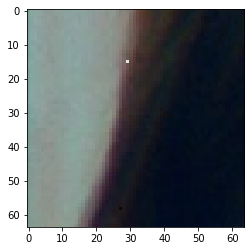

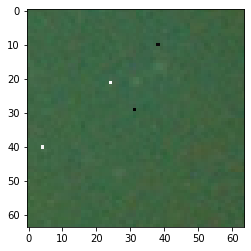

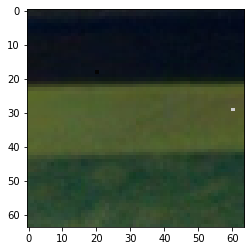

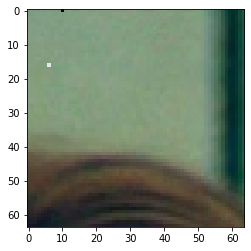

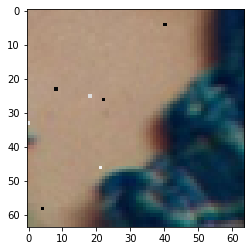

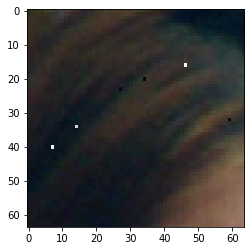

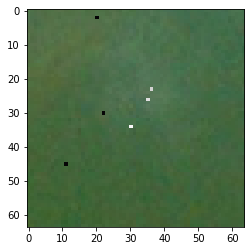

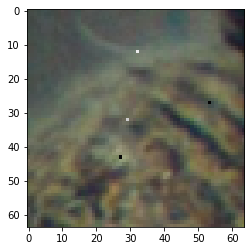

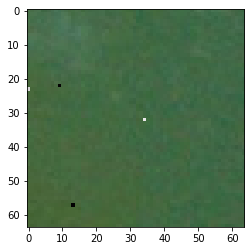

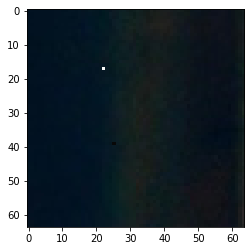

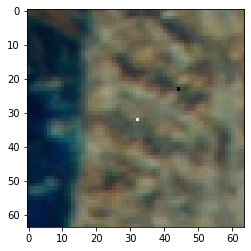

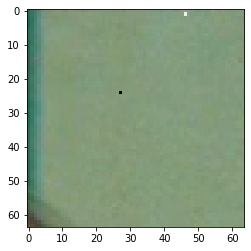

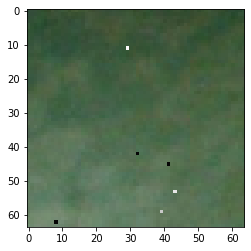

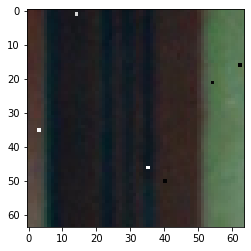

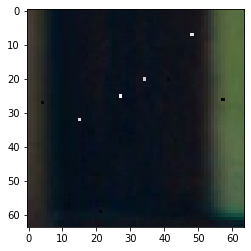

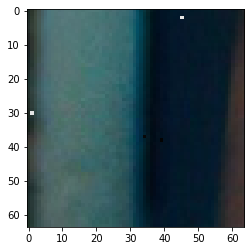

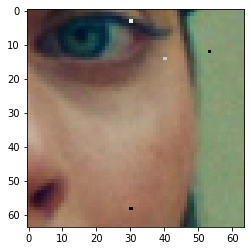

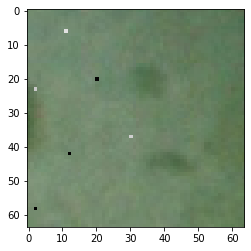

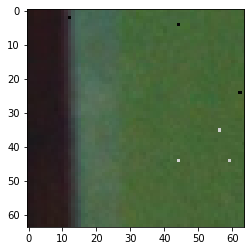

<Figure size 432x288 with 0 Axes>

In [16]:
from PIL import Image
for _, row in df[340:360].iterrows():
    print(row["y_pred"])
    pil = Image.open(f"test/{row['file']}", "r")
    df['img'] = plt.imshow(np.asarray(pil))
    plt.figure()